# Mapping change over time (Part 2)

<img src="images/huh.png" width=600>

In the previos lab, side-by-side maps were generated to present demographic shifts over space and time. However, with large number of areas displaying minimal population shifts, these changes can be hard to detect. In order to visibly highlight specific areas where certain population groups have increased and decreased, we calcluate the total population change as well as the percent change from one time period to another.

We begin this lab by importing the `chibamesh.geojson` file that was generated in the previous lab.

以前のラボでは、空間と時間にわたる人口動態の変化を示すために並列マップが生成されました。 ただし、人口の変化が最小限に抑えられている地域が多数あるため、これらの変化を検出するのは難しい場合があります。 特定の人口グループが増減した特定の地域を視覚的に強調するために、総人口の変化と、ある期間から別の期間への変化率を計算します。

このラボは、前のラボで生成された「chibamesh.geojson」ファイルをインポートすることから始めます。

## Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


### メッシュをインポート

In [2]:
# 空間データなので geopandas (gpd) でインポート
chibamesh = gpd.read_file('data/chibamesh.geojson')

## Map time


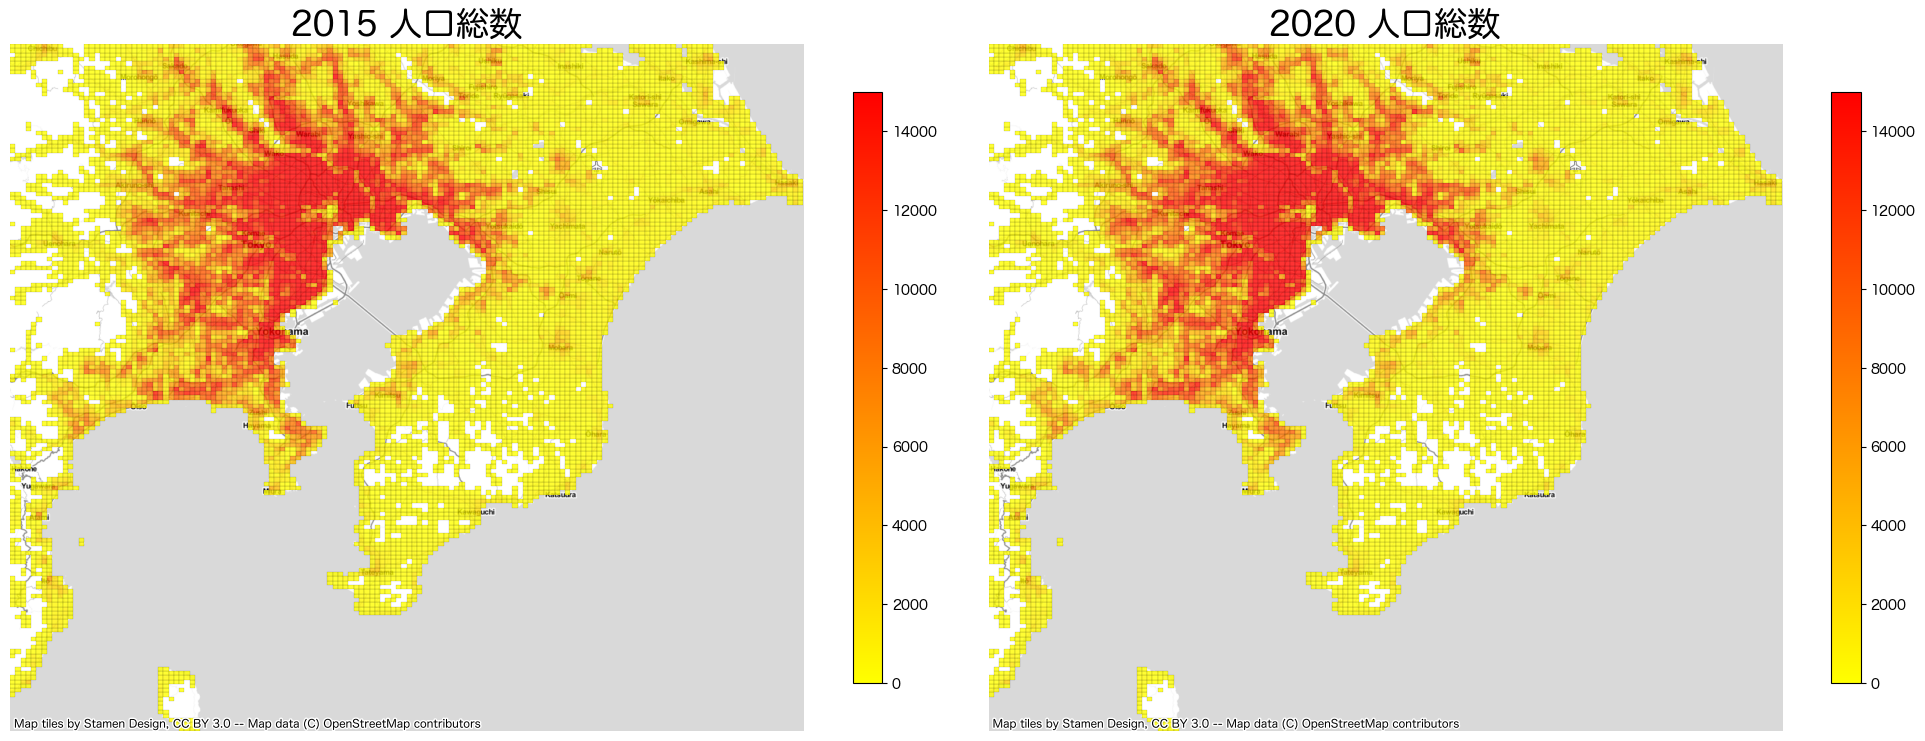

In [4]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
chibamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 人口総数',fontsize=24); # 左
ax[1].set_title('2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

# Create a new field for population change
These are beautiful side by side maps. However, one can hardly tell the difference between them! One way to show the difference between data from different time periods is to calculate the difference between them. To do so:

- create a new field `pop_change_2015_2020`
- create a new field `pop_percent_change_2015_2020`
- calculate the population change (difference) between 2015 and 2020
- calculate the population percent change (difference) between 2015 and 2020
- map the new field

横並びの美しい地図ができたね。 でも、違いを区別することはほとんどできない。 異なる期間のデータ間の差異を示す 1 つの方法は、データ間の差異を計算することです。 そうするために：

- 新しいフィールド「pop_change_2015_2020」を作成する
- 2015年と2020年の人口変化（差）を計算する
- 新しいフィールドをマップする

In [5]:
# create a new field with null values
chibamesh['pop_change_2015_2020'] = np.nan
chibamesh['pop_percent_change_2015_2020'] = np.nan

## 問題

🧐　まずは考えよう。なぜ【人口推移】(population change) と【人口割合の変化】(population percent change) を両方計算する必要があるの？

では、下のコードセルで次の二つの計算をしましょう。

- 2015 年から 2020 年までの総人口の絶対変化の計算
- 2015 年から 2020 年までの総人口の変化率の計算

ヒント：
- 2015年：`T000846001`
- 2020年：`T001100001`

なお、式の最初の部分は既に記入されてます。

In [10]:
# calculate population change 【人口推移】
chibamesh['pop_change_2015_2020'] = chibamesh['T001100001']-chibamesh['T000846001']

In [16]:
# calculate population percent change【人口割合の変化】
chibamesh['pop_percent_change_2015_2020'] = chibamesh['pop_change_2015_2020'] /chibamesh['T000846001']*100

In [17]:
# check!
chibamesh[['KEY_CODE','T000846001','T001100001','pop_change_2015_2020','pop_percent_change_2015_2020']].sample(5)

,KEY_CODE,T000846001,T001100001,pop_change_2015_2020,pop_percent_change_2015_2020
3812,53393497.0,14165.0,14231.0,66.0,0.465937
619,52395636.0,1902.0,1705.0,-197.0,-10.357518
9567,53406338.0,142.0,133.0,-9.0,-6.338028
884,52396699.0,199.0,212.0,13.0,6.532663
8020,53404018.0,3303.0,3163.0,-140.0,-4.238571


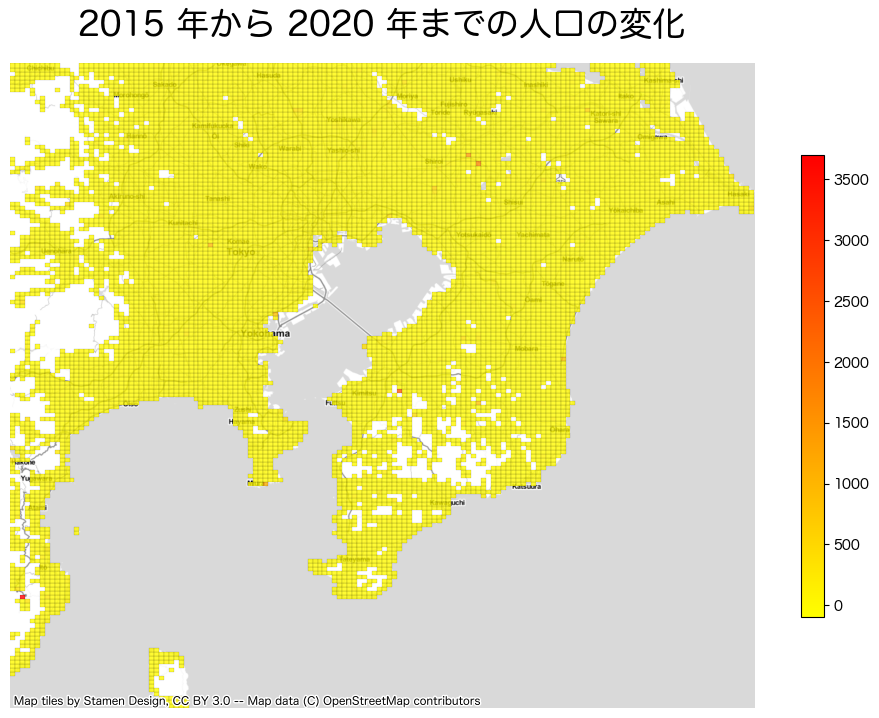

In [18]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) # 一つのマップなのでnrows,ncols=1

# 2015-2020 population change
chibamesh.plot(ax = ax,
        column='pop_percent_change_2015_2020',
        legend=True,
        legend_kwds={'shrink': 0.5},
        cmap='autumn_r',
        edgecolor='black',
        linewidth=0.1,
        alpha=0.8,)

# hide axes
ax.axis('off')

# title
ax.set_title('2015 年から 2020 年までの人口の変化',fontsize=24, pad=20);

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

This map is not very legible. How can we make it better? With maps that show positive and negative values, we use a divergent color scheme. Furthermore, in order to set the neutral color at the middle, we make sure to make the vmin and vmax values equal.

この地図はすごく読みにくいです。 どうすれば改善できるでしょうか? 正の値と負の値を示すマップでは、divergent カラー スキームを使用します。 さらに、中間色を設定するために、vmin と vmax の値が同じになるようにします。

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/diverging.png" width=500>


Single map:

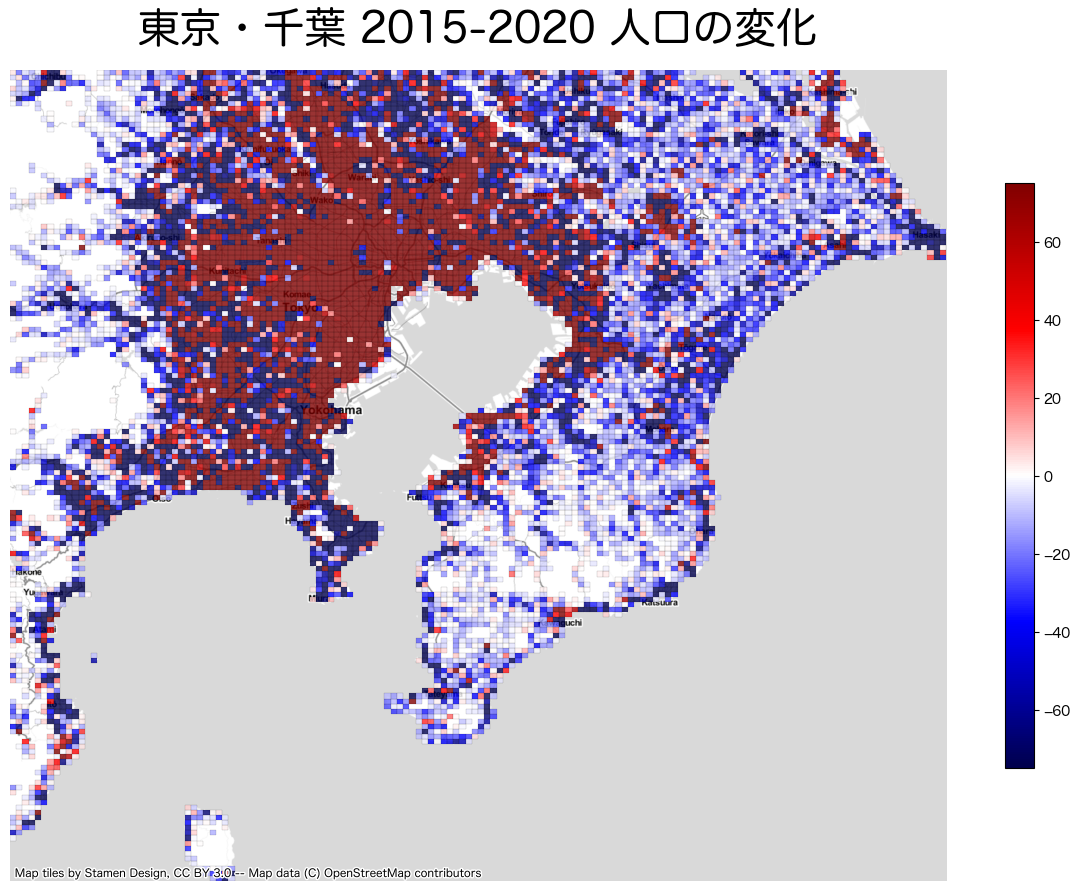

In [19]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
         )

# hide axes
ax.axis('off')

# title
ax.set_title('東京・千葉 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


Side-by-side maps:

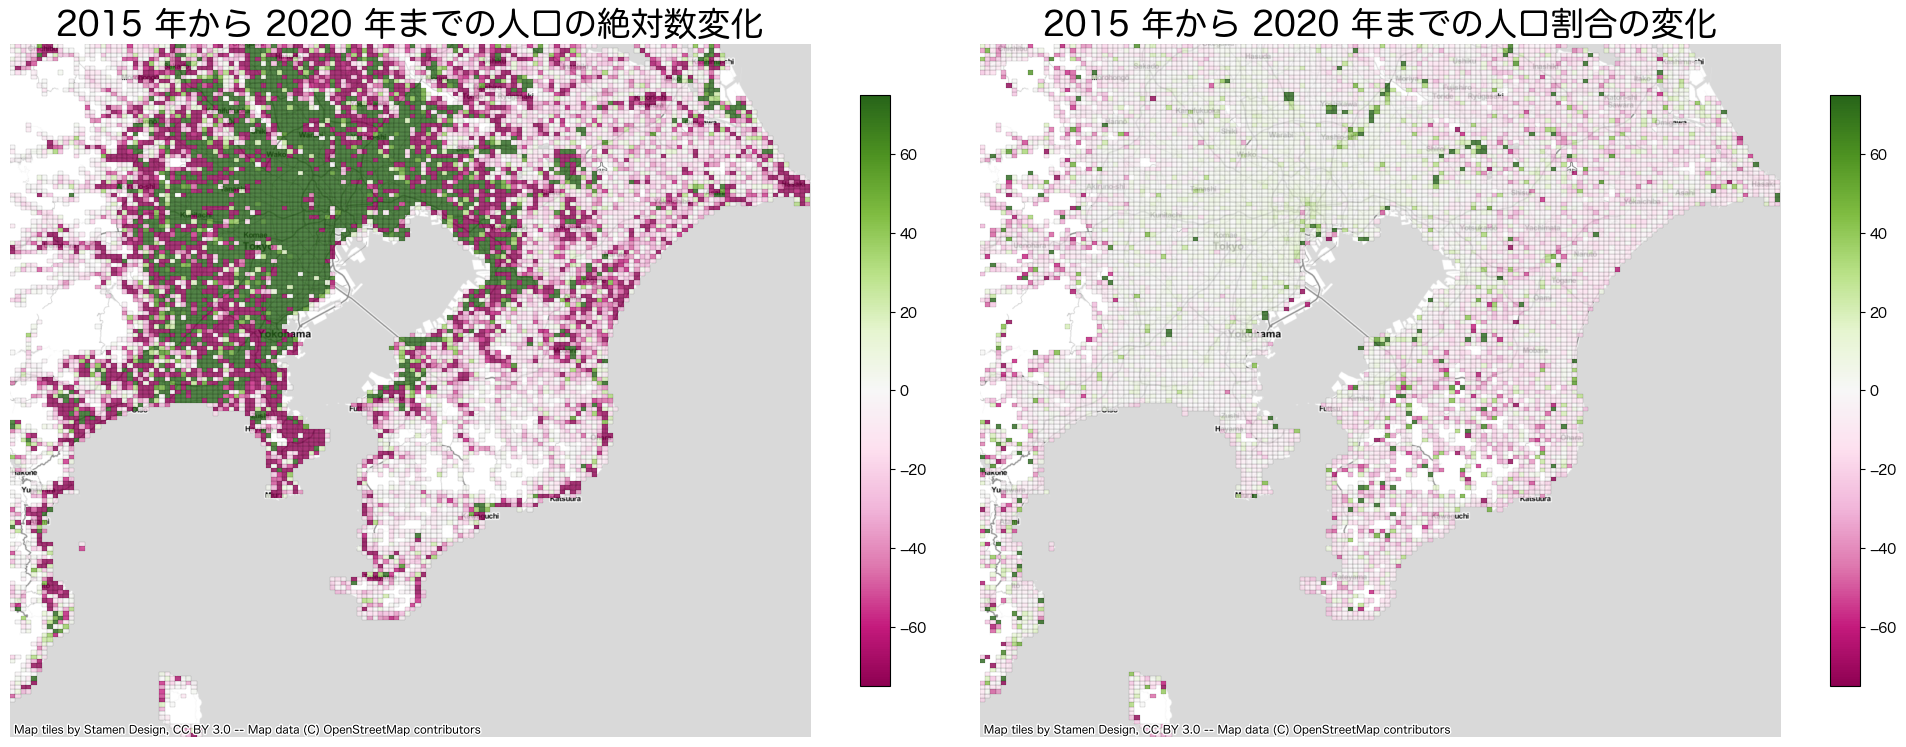

In [21]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # 左のマップ
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='PiYG',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
)

# 2020 population
chibamesh.plot(ax = ax[1], # 右のマップ
    column='pop_percent_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='PiYG',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 年から 2020 年までの人口の絶対数変化',fontsize=24); # 左
ax[1].set_title('2015 年から 2020 年までの人口割合の変化',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右